In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## Load and inspect data

In [2]:
miota_df = pd.read_csv(Path('../../resources/prices/coin_Iota.csv'), index_col='SNo')
miota_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,IOTA,MIOTA,2017-06-14 23:59:59,0.606196,0.495745,0.592347,0.528916,1.419490e+07,1.470138e+09
2,IOTA,MIOTA,2017-06-15 23:59:59,0.543165,0.300365,0.528284,0.363661,1.030040e+07,1.010807e+09
3,IOTA,MIOTA,2017-06-16 23:59:59,0.448249,0.309852,0.353285,0.410757,6.920690e+06,1.141712e+09
4,IOTA,MIOTA,2017-06-17 23:59:59,0.444205,0.414139,0.426762,0.419906,3.100660e+06,1.167141e+09
5,IOTA,MIOTA,2017-06-18 23:59:59,0.426069,0.393790,0.420597,0.405862,2.514450e+06,1.128106e+09
...,...,...,...,...,...,...,...,...,...
1351,IOTA,MIOTA,2021-02-23 23:59:59,1.313691,0.893540,1.306506,1.088496,3.415576e+08,3.025509e+09
1352,IOTA,MIOTA,2021-02-24 23:59:59,1.310238,1.032310,1.090636,1.194751,2.794682e+08,3.320846e+09
1353,IOTA,MIOTA,2021-02-25 23:59:59,1.245290,1.091847,1.193894,1.091847,1.524689e+08,3.034822e+09


In [3]:
miota_df['Date'] = pd.to_datetime(miota_df['Date']).dt.date
miota_df['Date'] = pd.to_datetime(miota_df['Date'])
miota_df['Spread'] = miota_df.High - miota_df.Low
miota_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1355 entries, 1 to 1355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       1355 non-null   object        
 1   Symbol     1355 non-null   object        
 2   Date       1355 non-null   datetime64[ns]
 3   High       1355 non-null   float64       
 4   Low        1355 non-null   float64       
 5   Open       1355 non-null   float64       
 6   Close      1355 non-null   float64       
 7   Volume     1355 non-null   float64       
 8   Marketcap  1355 non-null   float64       
 9   Spread     1355 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 116.4+ KB


## Plot the closing value of Iota over time

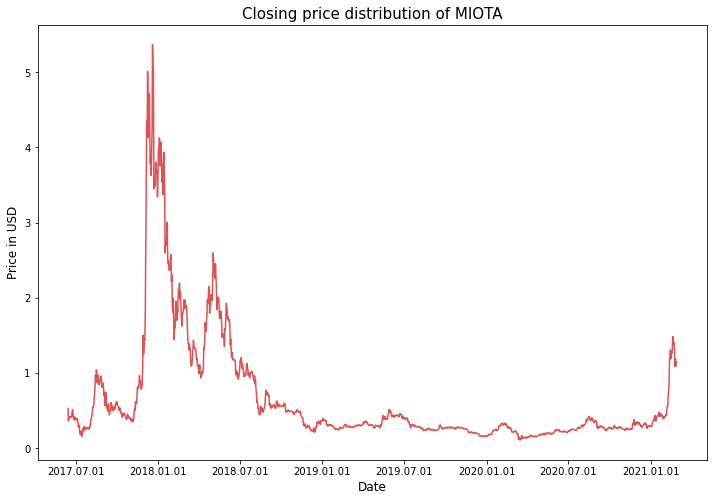

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = miota_df.Close.values, x=miota_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = miota_df.Close.values, x=miota_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of MIOTA", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

miota_df['Date_mpl'] = miota_df['Date'].apply(lambda x: mdates.date2num(x))

temp_miota_df = miota_df.copy(deep=False)
temp_miota_df = temp_miota_df.set_index(['Date'])
temp_miota_df = temp_miota_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_miota_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2017-06-14,0.606196,0.495745,0.592347,0.528916,1.419490e+07,17331.0
2017-06-15,0.543165,0.300365,0.528284,0.363661,1.030040e+07,17332.0
2017-06-16,0.448249,0.309852,0.353285,0.410757,6.920690e+06,17333.0
2017-06-17,0.444205,0.414139,0.426762,0.419906,3.100660e+06,17334.0
2017-06-18,0.426069,0.393790,0.420597,0.405862,2.514450e+06,17335.0
...,...,...,...,...,...,...
2021-02-23,1.313691,0.893540,1.306506,1.088496,3.415576e+08,18681.0
2021-02-24,1.310238,1.032310,1.090636,1.194751,2.794682e+08,18682.0
2021-02-25,1.245290,1.091847,1.193894,1.091847,1.524689e+08,18683.0


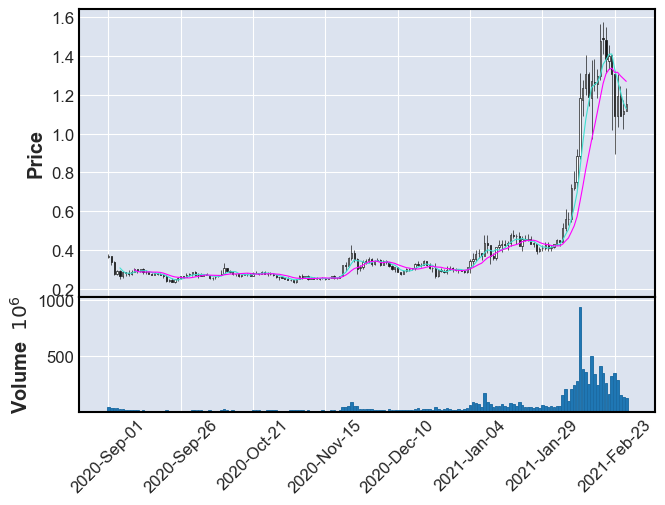

In [6]:
mpf.plot(temp_miota_df.loc['2020-9-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [7]:
from fbprophet import Prophet

In [8]:
INPUT_FILE = "coin_Iota.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-9-1']

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
182,2021-03-02 23:59:59,1.293375,1.141391,1.448772
183,2021-03-03 23:59:59,1.319479,1.188156,1.460809
184,2021-03-04 23:59:59,1.344330,1.210247,1.480574
185,2021-03-05 23:59:59,1.366987,1.226499,1.511909
186,2021-03-06 23:59:59,1.390996,1.246531,1.531760


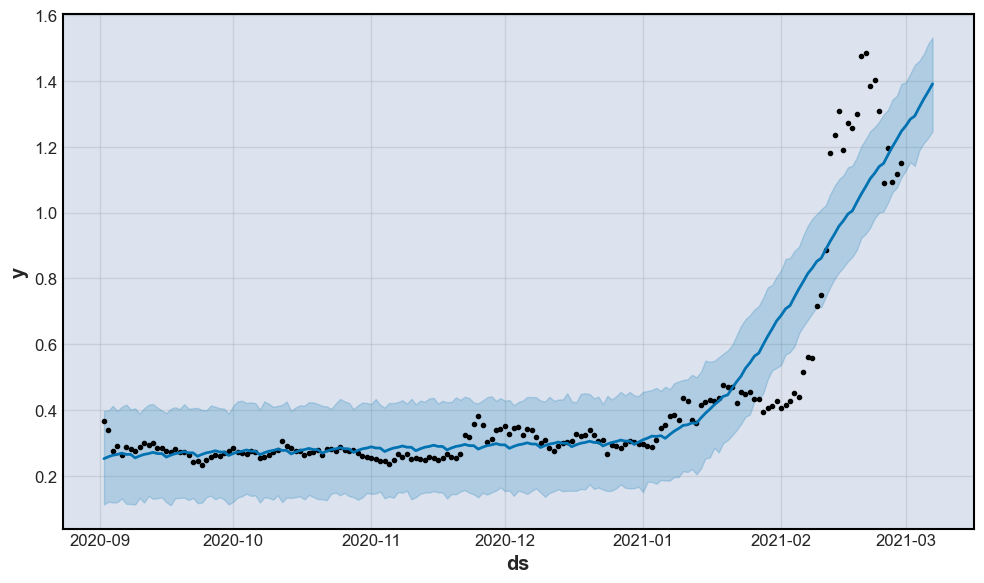

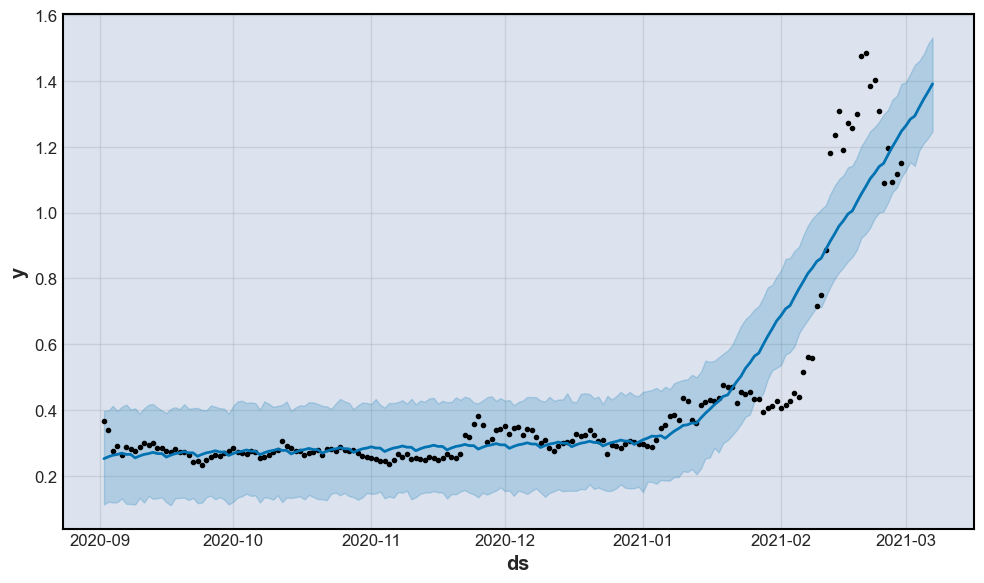

In [9]:
m.plot(forecast)

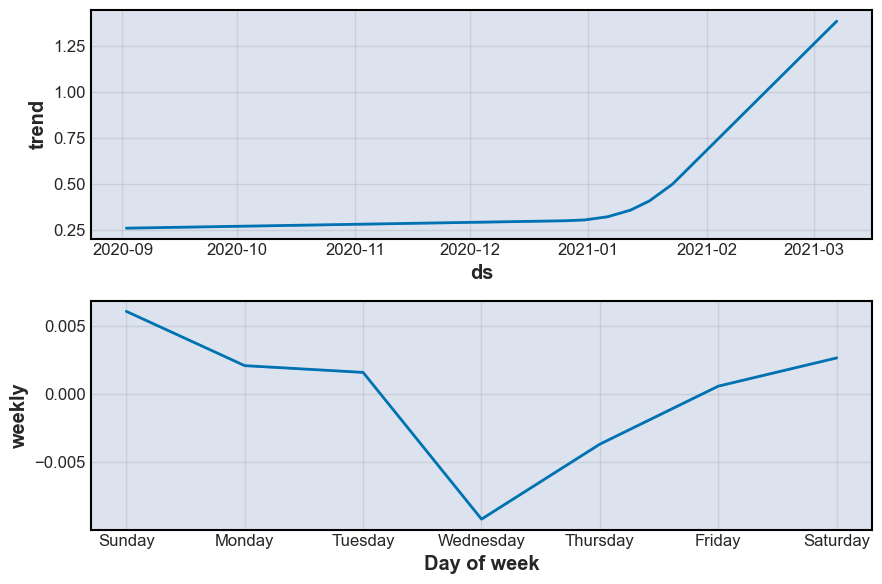

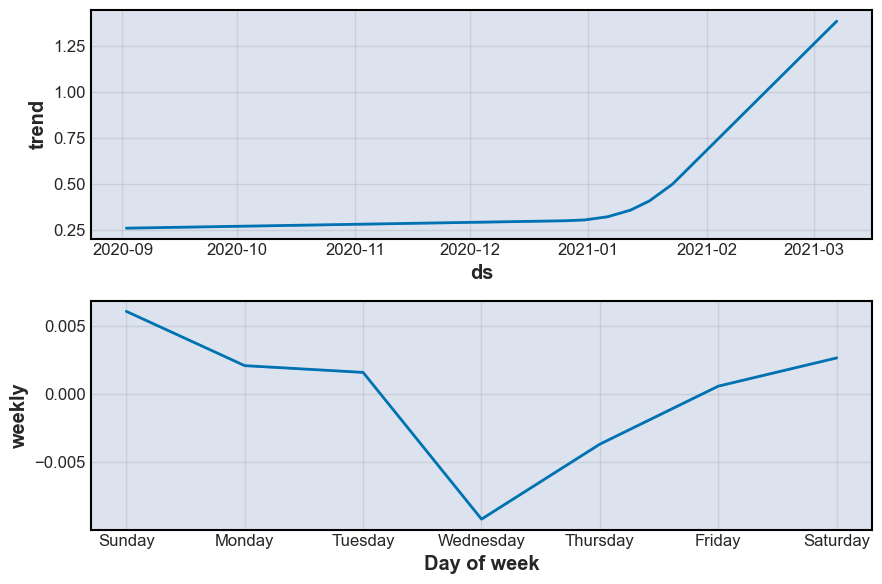

In [10]:
m.plot_components(forecast)